In [1]:
import itertools
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, kstest

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from utils.utils import elbow_and_silhouete_charts

In [2]:
DATA = '../data/cleaned_data.csv'

In [3]:
df = pd.read_csv(DATA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [5]:
numerical_features = df.select_dtypes(include='number').columns

## Not transformed numerical features

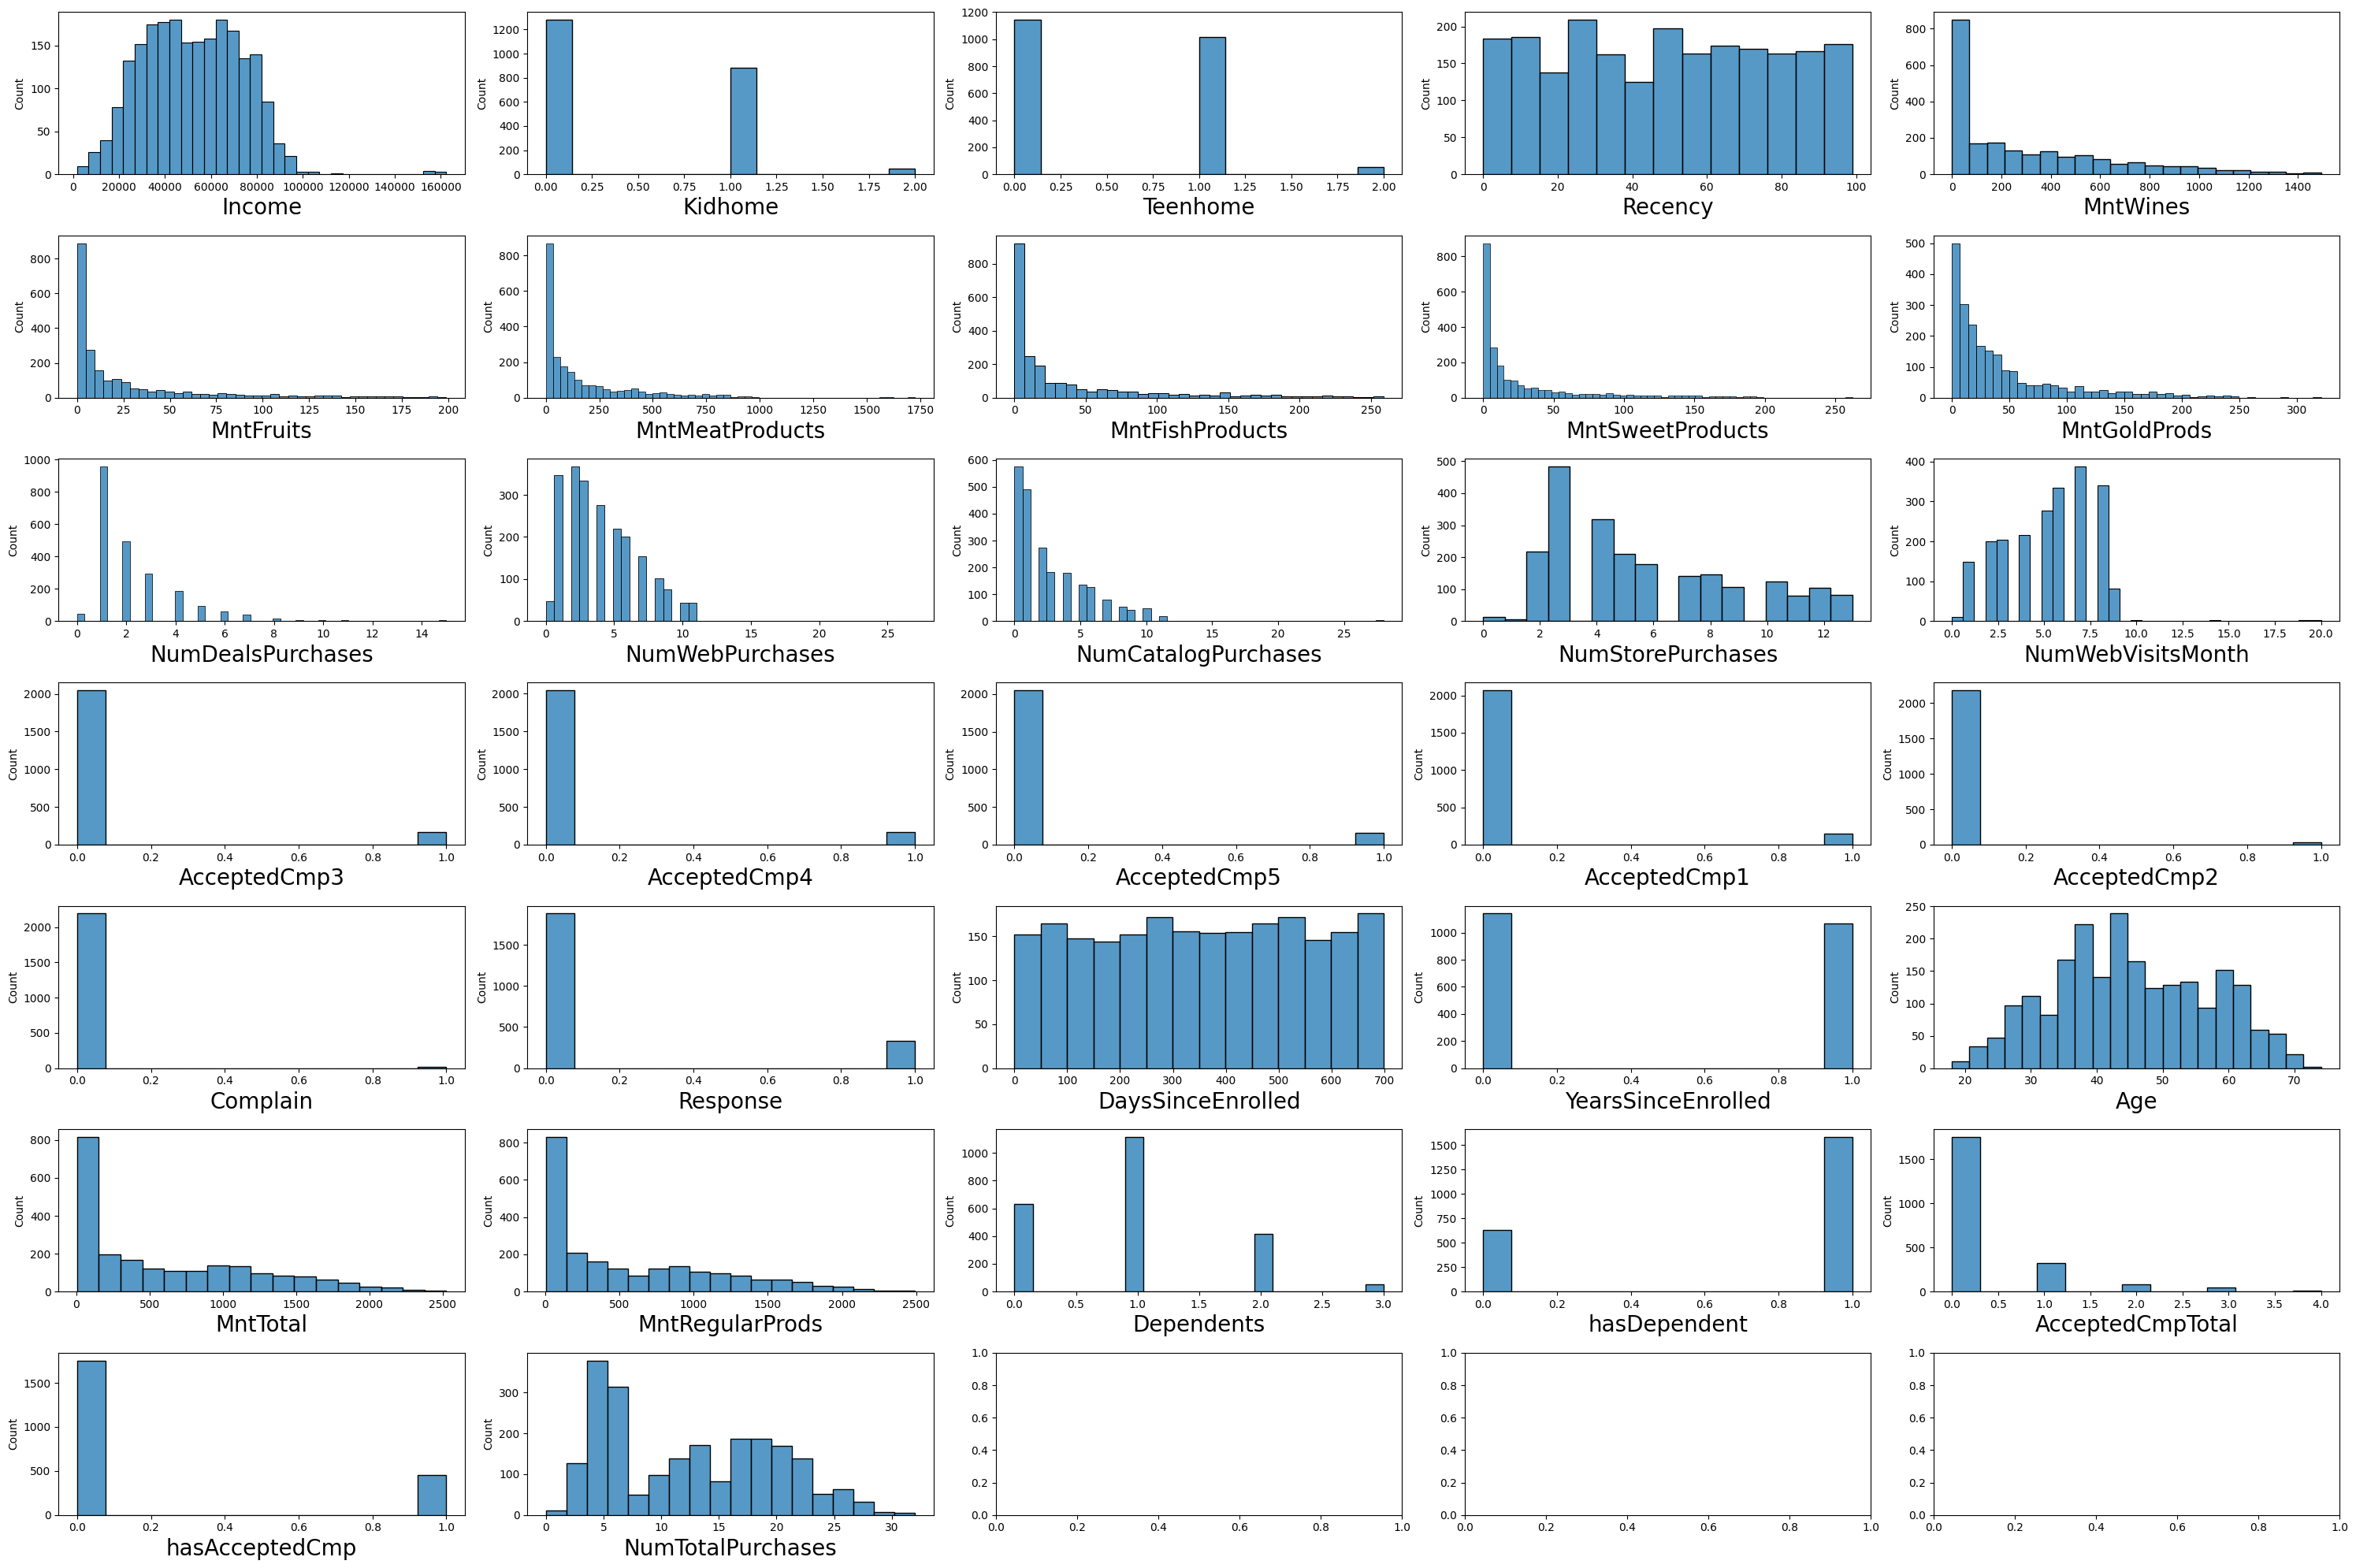

In [6]:
number_numerical_features = len(numerical_features)
ncols = 5
nrows = number_numerical_features // ncols + (1 if number_numerical_features % 3 > 0 else 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20), tight_layout=True)
for feature, ax in zip(numerical_features, axes.flatten()):
    sns.histplot(data=df, x=feature, ax=ax)
    ax.set_xlabel(feature, fontsize=20)

In [7]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'YearsSinceEnrolled',
       'Age', 'AgeGroup', 'MntTotal', 'MntRegularProds', 'Dependents',
       'hasDependent', 'AcceptedCmpTotal', 'hasAcceptedCmp',
       'NumTotalPurchases'],
      dtype='object')

In [8]:
one_hot_cols = [
    'Education',
    'Marital_Status',
    'Kidhome',
    'Teenhome',
    'AcceptedCmp3',
    'AcceptedCmp4', 
    'AcceptedCmp5', 
    'AcceptedCmp1', 
    'AcceptedCmp2',
    'Complain',
    'Response', 
    'hasDependent', 
    'hasAcceptedCmp', 
    'AgeGroup'
]

standard_scaler_cols = [
    'Income',
    'Age',
    'NumTotalPurchases'
]

power_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts',
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds',
    'MntTotal', 
    'MntRegularProds',
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases', 
    'NumWebVisitsMonth'
]

min_max_scaler_cols = [
    'Recency',
    'DaysSinceEnrolled',
    'YearsSinceEnrolled',
    'Dependents',
    'AcceptedCmpTotal'
]

In [9]:
preprocessing = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), one_hot_cols),
        ('standard', StandardScaler(), standard_scaler_cols),
        ('min_max', MinMaxScaler(), min_max_scaler_cols),
        ('power', PowerTransformer(), power_cols)
    ]
)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

In [10]:
df_scaled_not_ohe = df_scaled.loc[:, ~df_scaled.columns.str.startswith('one')]

## Transformed numerical features

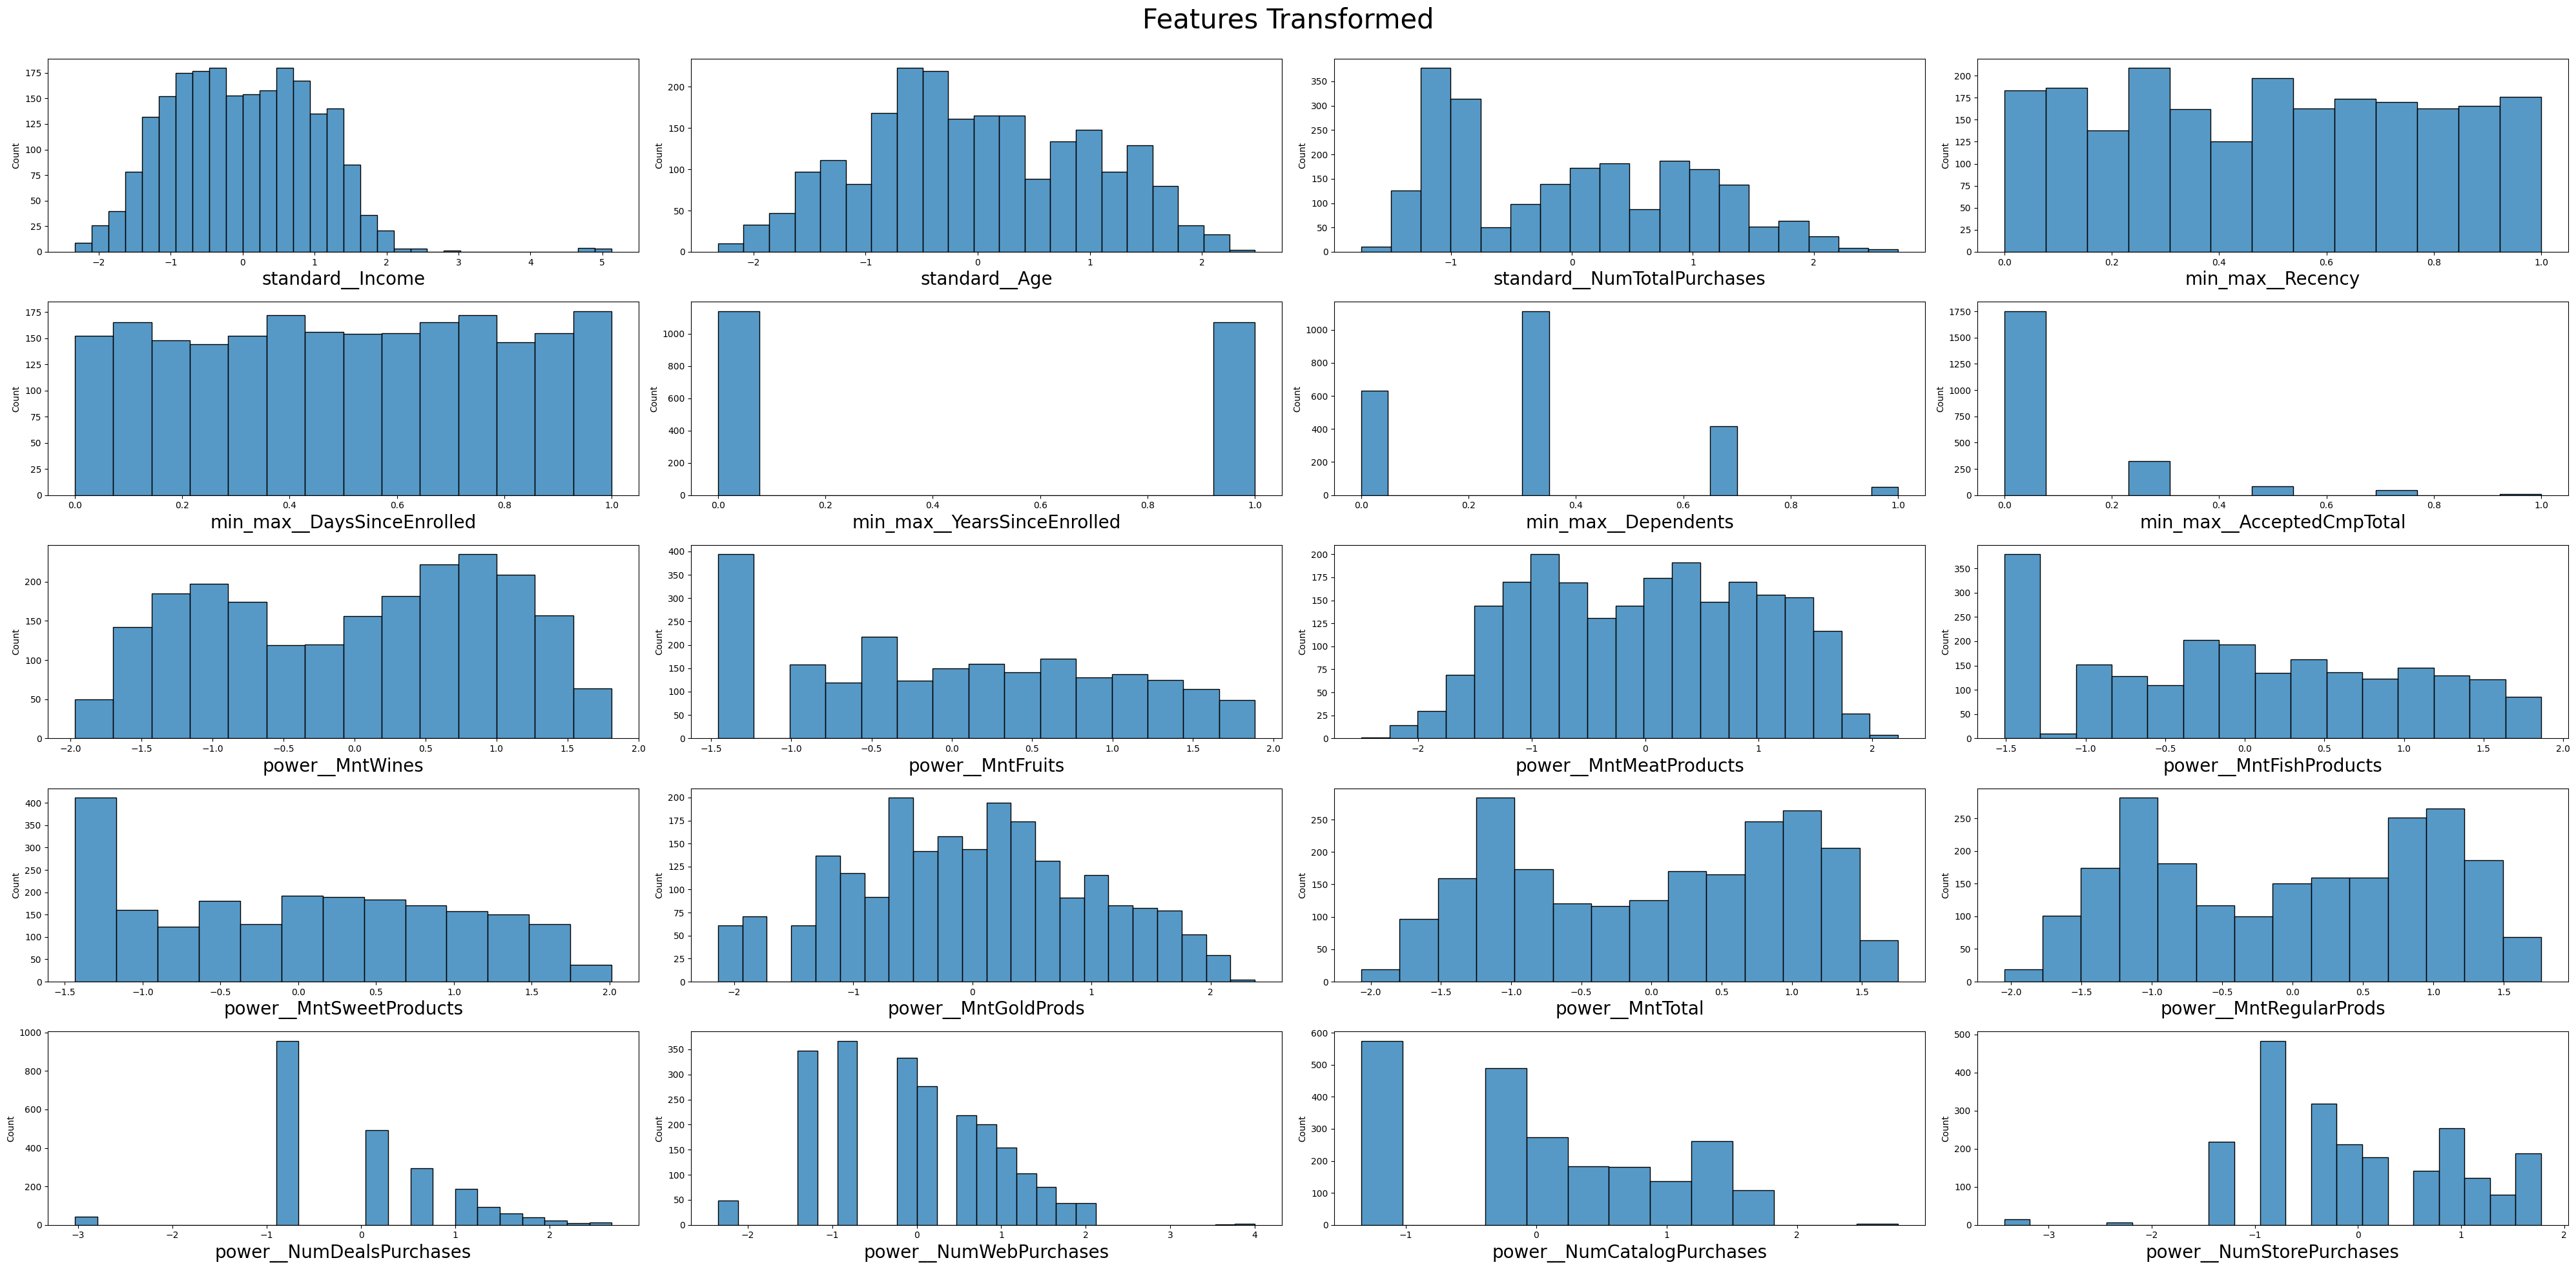

In [11]:
numerical_feature = df_scaled_not_ohe.columns
number_numerical_features = len(numerical_feature)
ncols = 4
nrows = number_numerical_features // ncols + (1 if number_numerical_features % 3 > 0 else 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, 20), tight_layout=True)
for feature, ax in zip(numerical_feature, axes.flatten()):
    sns.histplot(data=df_scaled_not_ohe, x=feature, ax=ax)
    ax.set_xlabel(feature, fontsize=20)

fig.suptitle('Features Transformed\n', fontsize=30);

## Using silhouette score and elbow method to define number of clusters

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\IgorNunes\anaconda3\envs\ifood-data-analyst\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\IgorNunes\anaconda3\envs\ifood-data-analyst\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\IgorNunes\anaconda3\envs\ifood-data-analyst\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 34: invalid start byte
c:\Users\IgorNunes\anaconda3\envs\ifood-data-analyst\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the numbe

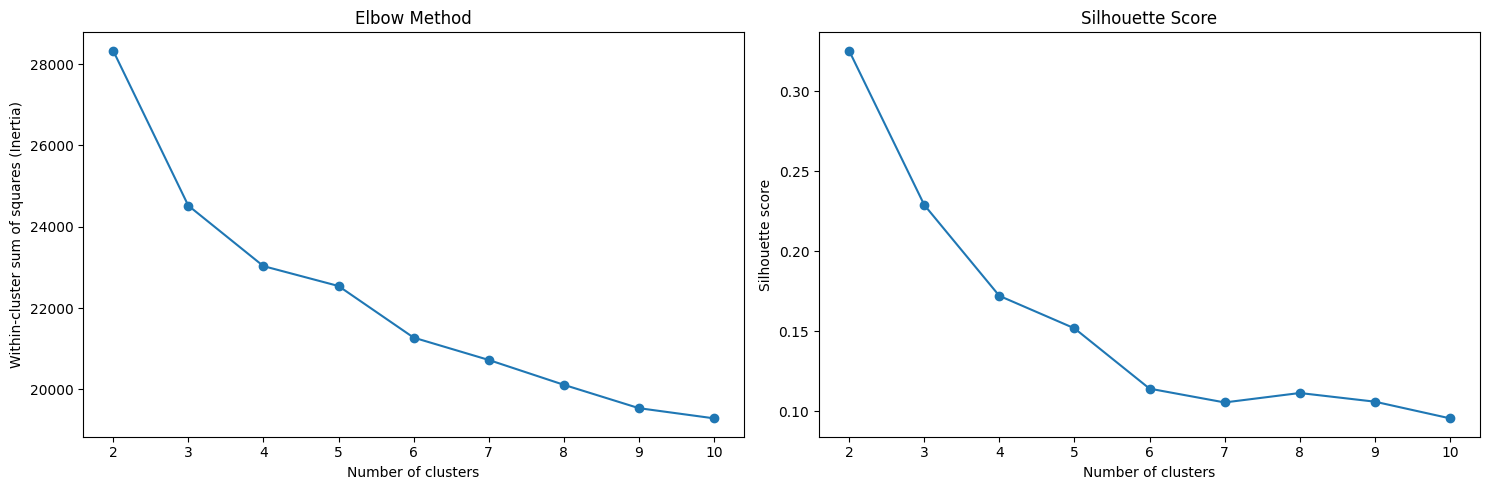

In [12]:
fig = elbow_and_silhouete_charts(dataframe=df_scaled);

- segmentation could happen with 3 clusters, as elbow method indicates and silhouette is still considered 'high'

## Creating and fitting the pipeline with KMeans

In [13]:
pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('clustering', KMeans(n_clusters=3, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2', 'Complain',
                                                   'Response', 'hasDependent',
                                                   'hasAcceptedCmp',
                                                   'AgeGroup']),
                                                 ('standard', StandardScaler(),
                                                  ['Income', 'Age',
                                                   'NumTotalPur...
                                                   'Dependents',
                                                   'AcceptedCmpTotal']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds', 'MntTotal',
                                                   'MntRegularProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [14]:
df_clustered = df.copy()

df_clustered['cluster'] = pipeline.named_steps['clustering'].labels_

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Dependents,hasDependent,AcceptedCmpTotal,hasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,16-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [15]:
df_clustered['cluster'].value_counts()

cluster
1    885
0    669
2    658
Name: count, dtype: int64

## Clusters Interpretation

In [30]:
df_clustered.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'YearsSinceEnrolled',
       'Age', 'AgeGroup', 'MntTotal', 'MntRegularProds', 'Dependents',
       'hasDependent', 'AcceptedCmpTotal', 'hasAcceptedCmp',
       'NumTotalPurchases', 'cluster'],
      dtype='object')

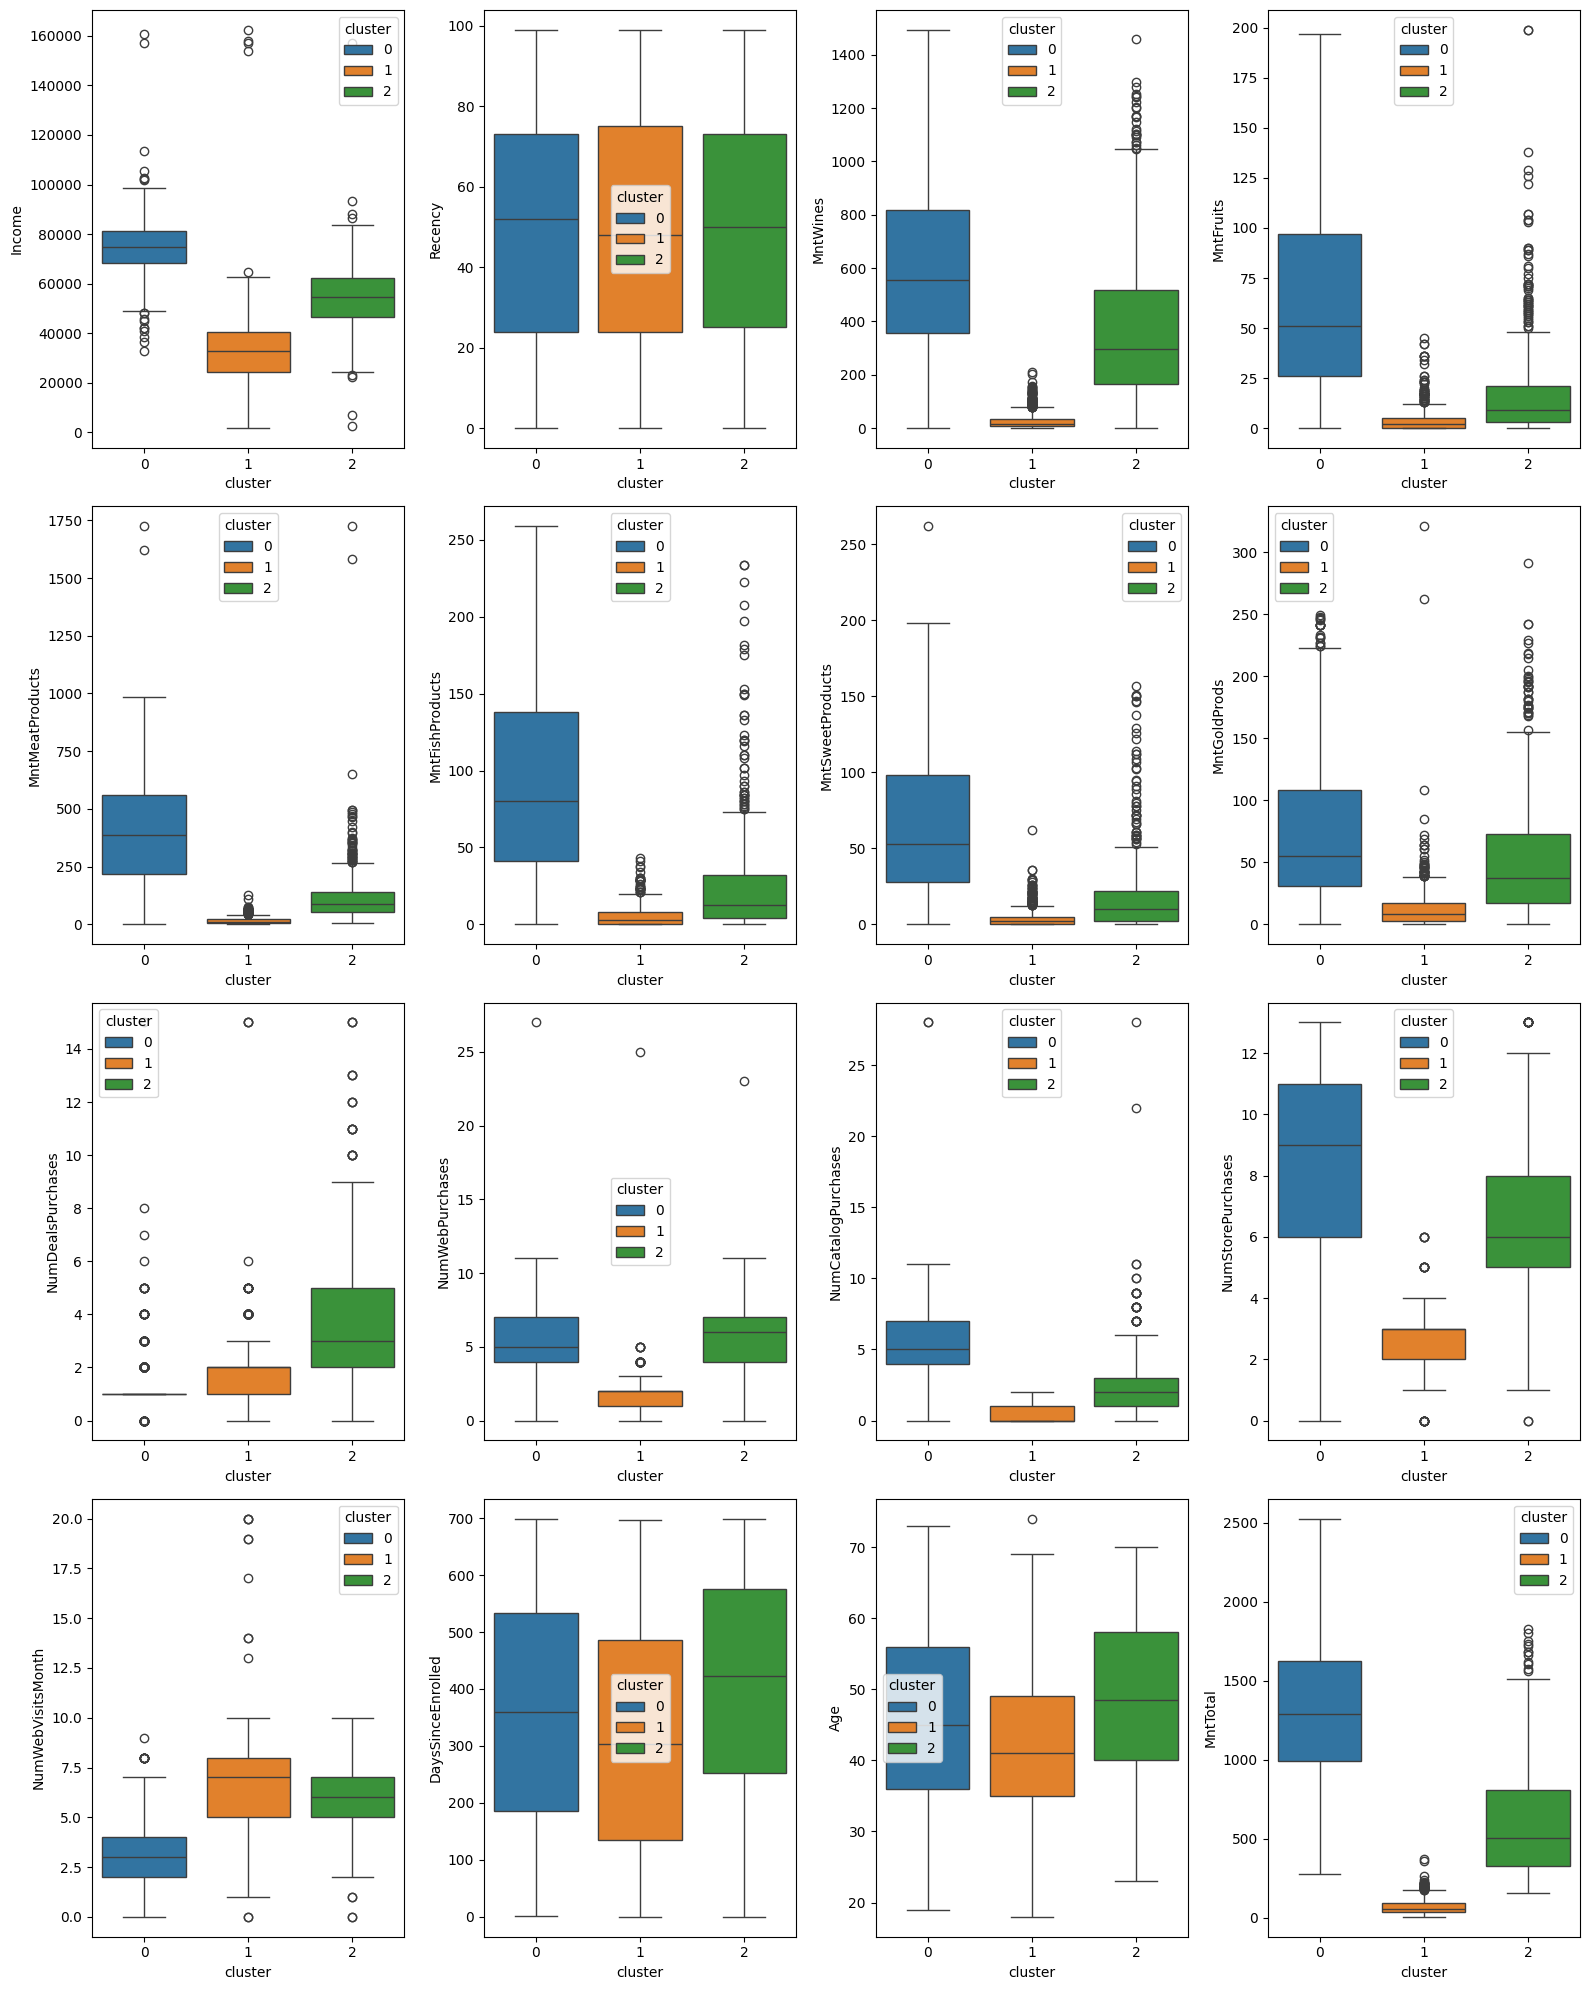

In [31]:
cols = [
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds',
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases', 
    'NumWebVisitsMonth',
    'DaysSinceEnrolled',
    'Age',
    'MntTotal', 
    'MntRegularProds',
    'NumTotalPurchases'
]
ncols = 4
nrows = len(cols) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 5*nrows), tight_layout=True)

for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(data=df_clustered, x='cluster', y=col, hue='cluster', ax=ax, fill=True, palette='tab10')

From the above boxplots we can say that:

- Cluster 1 is represented by small income people relatively to clusters 0 and 2. They hold the smallest amount purchased when compared to the other clusters for all product categories: fish, meat, wines, etc. The same behaviour can be seen with number of purchases, except for the deals purchases where cluster 1 contains on average more deals purchased then cluster 0. The age doesn't change much between clusters, but looking at the median values we can say that cluster 1 is on average represented by younger people than clusters 0 and 2. Cluster 0 also represents those people that visits the website most often compared to the other clusters.
- Cluster 2 is represented by average income people relatively to cluster 0 and 1. The amount purchased and the number of purchases are generally on average as well, except for deal purchases and web purchases, where cluster 2 represents the biggest amount of deals purchases and its web purchases are comparable to cluster 0. When looking at the age, again there is no big separation, but looking at the median, we can say they are older than the other two clusters. They also visit the website more often compared to cluster 0, and almost equivalent to cluster 1.
- Cluster 0 is represented by the high income people relatively to clusters 1 and 2. The amount purchased by them is the highest for all product categories and they are also the ones with higher number of purchases with respect to web, catalog and store purchases, except for the number of deal purchases, where they are least frequent. They also don't visit the website much as compared to clusters 1 and 2.

Recency is very similar for all three clusters, with a small difference on median. DaysSinceEnrolled follows the same pattern of the age, not very different between clusters, but with small median differences.

